In [1]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------  12.8/12.9 MB 73.2 MB/s eta 0:00:01
     --------------------------------------- 12.9/12.9 MB 38.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import spacy
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [5]:
nlp = spacy.load("es_core_news_sm")
df = pd.read_csv("../data/comentarios.csv")

def preprocesar(texto):
    doc = nlp(texto.lower())
    return [t.lemma_ for t in doc if not t.is_stop and t.is_alpha]

comentarios_tokens = df["texto_comentario"].apply(preprocesar)

In [16]:
# Entrenar Word2Vec
model = Word2Vec(
    sentences=comentarios_tokens,
    vector_size=50,  # dimensión pequeña para demo
    window=10, # Venta no fácilmente escalable. Puede perder contexto con una ventana muy pequeña
    min_count=5,
    workers=4
)

# Consultar palabras más similares o relacionadas
print(model.wv.most_similar("laptop", topn=5))
print(model.wv.most_similar("cámara", topn=5))

[('gráfico', 0.9984956383705139), ('rápido', 0.9984239339828491), ('rendimiento', 0.9983038902282715), ('calidad', 0.9982954263687134), ('alto', 0.9981736540794373)]
[('calidad', 0.9988502264022827), ('diseño', 0.9986737966537476), ('alto', 0.9985839128494263), ('fácil', 0.9985584616661072), ('perfecto', 0.9985331296920776)]


In [17]:
# Acceder y mostrar el vector de la palabra "laptop"
print("\nVector de la palabra 'laptop':")
print(model.wv['laptop'])

# Acceder y mostrar el vector de la palabra "cámara"
print("\nVector de la palabra 'cámara':")
print(model.wv['cámara'])

# Resultados son el contexto de la palabra analizada respecto a sus pares en la ventana


Vector de la palabra 'laptop':
[ 1.23072125e-01  9.80032887e-03  1.43744856e-01 -3.93361188e-02
  7.06159547e-02 -4.06439662e-01  3.18902522e-01  5.65083921e-01
 -3.99896026e-01 -1.18543640e-01  9.38596800e-02 -3.65437239e-01
  2.58583687e-02  2.65278369e-01 -9.22535453e-03  3.04304272e-01
  1.58174962e-01  1.34145513e-01 -5.60310423e-01 -1.63437456e-01
 -2.22510826e-02  2.36796483e-01  2.15109766e-01 -1.50563911e-01
  2.07030565e-01  1.18410692e-01 -7.76633918e-02  7.89816957e-03
 -2.69540220e-01  4.46654931e-02 -3.00450381e-02  1.25765488e-01
 -1.74789578e-01 -1.42389029e-01 -3.58314455e-01  2.09469795e-01
  5.29606819e-01  2.20001951e-01  1.51334435e-01 -2.43853286e-01
  4.28506494e-01  3.22271604e-04  5.05093783e-02  1.18399739e-01
  6.97370589e-01 -8.08597878e-02  5.50193302e-02 -1.89104572e-01
  1.62283033e-01  9.66145098e-02]

Vector de la palabra 'cámara':
[ 0.15566538  0.01040593  0.1532631  -0.06242028  0.08615863 -0.4846301
  0.397984    0.65682197 -0.4813117  -0.10677461  

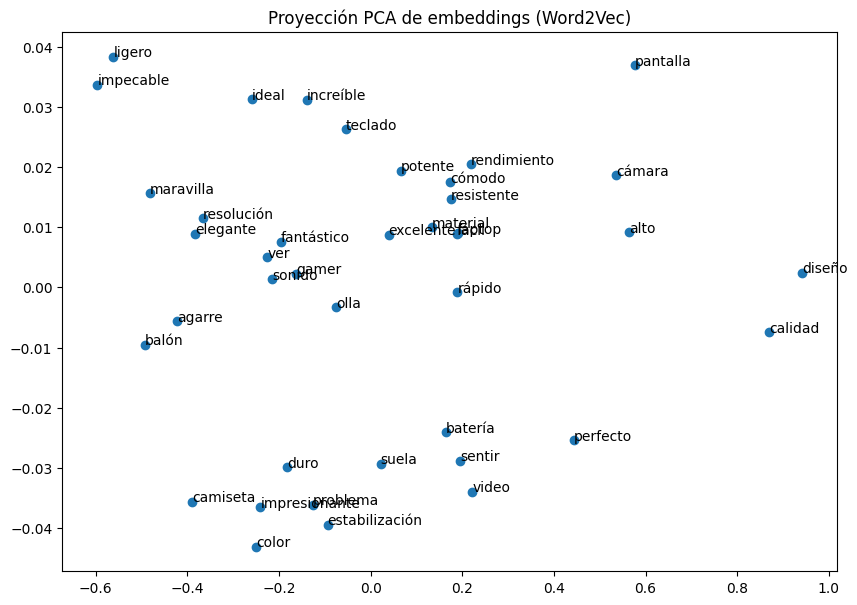

In [18]:
words = list(model.wv.key_to_index.keys())[:40]
X = model.wv[words]

pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.figure(figsize=(10,7))
plt.scatter(coords[:,0], coords[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (coords[i,0], coords[i,1]))
plt.title("Proyección PCA de embeddings (Word2Vec)")
plt.show()